In [36]:
from cvrp_algorithms import SimpleAco, AcoSigmaBestAnts, AcoImprovedPheromoneUpdate, Aco2opt, Greedy
import cvrpcases as cvrp
from array import *
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.backends.backend_pdf import PdfPages

def listToString(list):
    str1 = ''   
    for ele in list:  
        str1 += str(ele)+'\n' 
    str1 = str1[:-2] 
    return str1  

def saveFile(firstLine, vector, file):
    text_file = open(file, "w+")
    text_file.write(firstLine+'\n')
    n = text_file.write(listToString(vector))
    text_file.close()

def readVector(file):
    file1 = open(file, 'r') 
    Lines = file1.readlines() 
    v = np.zeros(len(Lines)-1)
    for it in range(len(v)):
        v[it] = float(Lines[it+1])
    return v

def readVector2(file):
    file1 = open(file, 'r') 
    Lines = file1.readlines() 
    v = list(range(len(Lines)-1))
    for it in range(len(v)):
        for char in Lines[it+1]:
            if char in "[] ":
                Lines[it+1]=Lines[it+1].replace(char,'')
        v[it] = np.fromstring(Lines[it+1], dtype=float, sep=',').reshape((5,6))
    return v

In [8]:
print("Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco")

seedCount = 5
iterationCount = 100
iterationJump = 2

cases =[
r'datasets\A\A-n32-k5.vrp',
r'datasets\A\A-n33-k5.vrp',
r'datasets\A\A-n33-k6.vrp',
r'datasets\A\A-n34-k5.vrp',
r'datasets\A\A-n36-k5.vrp',
r'datasets\A\A-n37-k5.vrp',
r'datasets\A\A-n37-k6.vrp',
r'datasets\A\A-n38-k5.vrp',
r'datasets\A\A-n39-k5.vrp',
r'datasets\A\A-n39-k6.vrp']



#hyp1_1 = [[[0 for z in range(len(cases))] for x in range(seedCount)] for y in range(0,math.floor(iterationCount/iterationJump))] 
hyp1_1 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))


for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = SimpleAco(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_1[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_1[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean1  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed',mean1,r'results/h1/mean1.txt')
saveFile('sd1  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed',sd1,r'results/h1/sd1.txt')

hyp1_2 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoSigmaBestAnts(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_2[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_2[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean2   ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed',mean1,r'results/h1/mean2.txt')
saveFile('sd2   ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed',sd1,r'results/h1/sd2.txt')


hyp1_3 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = AcoImprovedPheromoneUpdate(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_3[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_3[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean3  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed',mean1,r'results/h1/mean3.txt')
saveFile('sd3  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, sigma = 1, seed = seed',sd1,r'results/h1/sd3.txt')


hyp1_4 = np.zeros((math.floor(iterationCount/iterationJump), seedCount, len(cases)))

for cas in range(len(cases)):
    for it in range(1,iterationCount+1,iterationJump):
        print(it)
        for seed in range(seedCount):
            algorithm = Aco2opt(cvrp.load_case(cases[cas]), ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed)
            solution, path = algorithm.compute(log_level=0)
            hyp1_4[math.floor(it/iterationJump)][seed][cas] = solution

sums = np.zeros((math.floor(iterationCount/iterationJump), seedCount))
for seed in range(seedCount):
    for it in range(1,iterationCount+1,iterationJump):
        sums[math.floor(it/iterationJump),seed] = np.sum(hyp1_4[math.floor(it/iterationJump),seed,:])

mean1 = np.zeros(len(sums))
sd1 = np.zeros(len(sums))
for i in range(len(sums)):
    mean1[i] = np.mean(sums[i,:])
    sd1[i] = np.std(sums[i,:])
saveFile('mean4  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed',mean1,r'results/h1/mean4.txt')
saveFile('sd4  ants_count=10, max_iterations=it, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=10, seed = seed',sd1,r'results/h1/sd4.txt')

Hipoteza 1: Jak liczba iteracji wpływa na jakość rozwiązania? - przypadek 1 - algorytm - SimpleAco
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
1
3
5
7
9
11
13
15
17
19
21
23


In [2]:
mean1 = readVector(r'results/h1/mean1.txt')
mean2 = readVector(r'results/h1/mean2.txt')
mean3 = readVector(r'results/h1/mean3.txt')
mean4 = readVector(r'results/h1/mean4.txt')

sd1 = readVector(r'results/h1/sd1.txt')
sd2 = readVector(r'results/h1/sd2.txt')
sd3 = readVector(r'results/h1/sd3.txt')
sd4 = readVector(r'results/h1/sd4.txt')

plt.plot(range(1,5,2), mean1, 'ro',range(1,5,2), mean2, 'go',range(1,5,2), mean3, 'yo',range(1,5,2), mean4, 'bo')
plt.axis([0, 3, 500, 15000])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (50,)

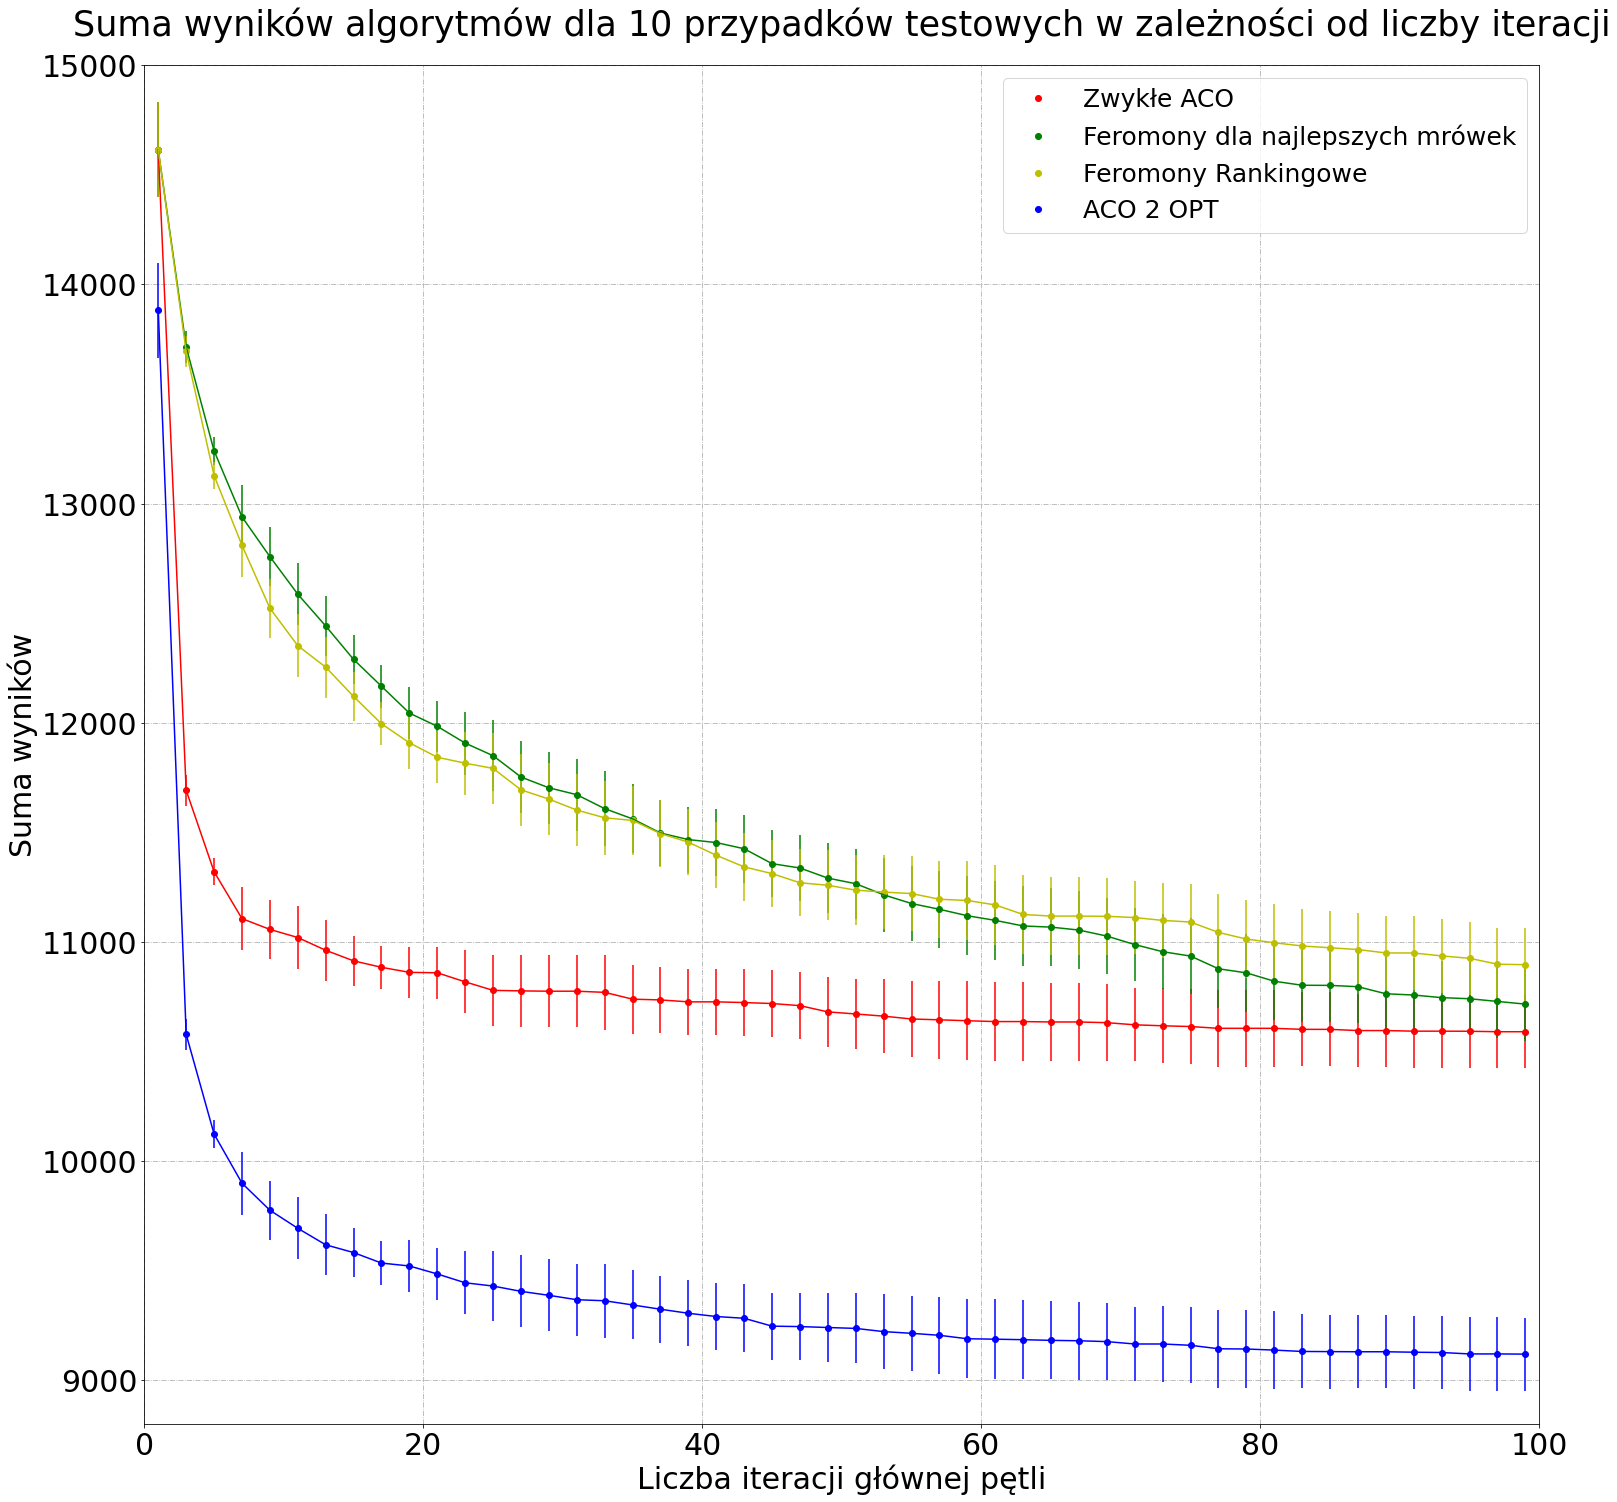

In [47]:
plt.figure(figsize=(25,25))
plt.plot(range(1,100,2), mean1, 'ro', label = "Zwykłe ACO")
plt.errorbar(range(1,100,2), mean1, yerr=sd1,color = 'r', ecolor = 'r')
plt.plot(range(1,100,2), mean2, 'go', label = "Feromony dla najlepszych mrówek")
plt.errorbar(range(1,100,2), mean2, yerr=sd1,color = 'g', ecolor = 'g')
plt.plot(range(1,100,2), mean3, 'yo', label = "Feromony Rankingowe")
plt.errorbar(range(1,100,2), mean3, yerr=sd1,color = 'y', ecolor = 'y')
plt.plot(range(1,100,2), mean4, 'bo', label = "ACO 2 OPT")
plt.errorbar(range(1,100,2), mean4, yerr=sd1,color = 'b', ecolor = 'b')
plt.axis([0, 100, 8800, 15000])
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel('Liczba iteracji głównej pętli', fontsize=30)
plt.ylabel('Suma wyników', fontsize=30)
plt.legend(loc='upper right',prop={'size': 25})
plt.title('Suma wyników algorytmów dla 10 przypadków testowych w zależności od liczby iteracji', fontsize=35, pad=30)
plt.grid(True, linestyle='-.')
plt.show()

In [55]:
with PdfPages(r'charts\hyp1.pdf') as export_pdf:  
    plt.figure(figsize=(25,25))
    plt.plot(range(1,100,2), mean1, 'ro', label = "Zwykłe ACO")
    plt.errorbar(range(1,100,2), mean1, yerr=sd1,color = 'r', ecolor = 'r')
    plt.plot(range(1,100,2), mean2, 'go', label = "Feromony dla najlepszych mrówek")
    plt.errorbar(range(1,100,2), mean2, yerr=sd1,color = 'g', ecolor = 'g')
    plt.plot(range(1,100,2), mean3, 'yo', label = "Feromony Rankingowe")
    plt.errorbar(range(1,100,2), mean3, yerr=sd1,color = 'y', ecolor = 'y')
    plt.plot(range(1,100,2), mean4, 'bo', label = "ACO 2 OPT")
    plt.errorbar(range(1,100,2), mean4, yerr=sd1,color = 'b', ecolor = 'b')
    plt.axis([0, 100, 8800, 15000])
    plt.tick_params(axis='x', labelsize=40)
    plt.tick_params(axis='y', labelsize=40)
    plt.xlabel('Liczba iteracji głównej pętli', fontsize=40)
    plt.ylabel('Suma wyników', fontsize=40)
    plt.legend(loc='upper right',prop={'size': 35})
    plt.title('Suma wyników algorytmów dla 10 przypadków testowych w zależności od liczby iteracji', fontsize=40, pad=50)
    plt.grid(True, linestyle='-.')
    export_pdf.savefig()
    plt.close()

50

In [42]:
hyp2_1_0 = readVector2(r'results/h2/hyp2_1_0.txt')
hyp2_1_1 = readVector2(r'results/h2/hyp2_1_1.txt')
hyp2_1_2 = readVector2(r'results/h2/hyp2_1_2.txt')
hyp2_1_3 = readVector2(r'results/h2/hyp2_1_3.txt')
hyp2_2_0 = readVector2(r'results/h2/hyp2_2_0.txt')
hyp2_2_1 = readVector2(r'results/h2/hyp2_2_1.txt')
hyp2_2_2 = readVector2(r'results/h2/hyp2_2_2.txt')
hyp2_2_3 = readVector2(r'results/h2/hyp2_2_3.txt')
hyp2_3_0 = readVector2(r'results/h2/hyp2_3_0.txt')
hyp2_3_1 = readVector2(r'results/h2/hyp2_3_1.txt')
hyp2_3_2 = readVector2(r'results/h2/hyp2_3_2.txt')
hyp2_3_3 = readVector2(r'results/h2/hyp2_3_3.txt')
hyp2_4_0 = readVector2(r'results/h2/hyp2_4_0.txt')
hyp2_4_1 = readVector2(r'results/h2/hyp2_4_1.txt')
hyp2_4_2 = readVector2(r'results/h2/hyp2_4_2.txt')
hyp2_4_3 = readVector2(r'results/h2/hyp2_4_3.txt')

In [44]:
print(hyp2_1_0[0][1,2])
print(hyp2_1_0[0][:,0])

1228.4173188895759
[1473.21640117 1404.90391934 1418.91851296 1302.96914866 1253.16701476]


In [ ]:
h210mean = np.zeros(len(20))
h210sd = np.zeros(len(20))
for i in range(len(20)):
    h210mean[i] = np.mean(sums[i,:])
    h210sd[i] = np.std(sums[i,:])